In [39]:
using Turing, Plots, StatsPlots, Distributions, KernelDensity

using Random
using DataFrames, CSV, HTTP
using PlotlyJS
Random.seed!(1345);

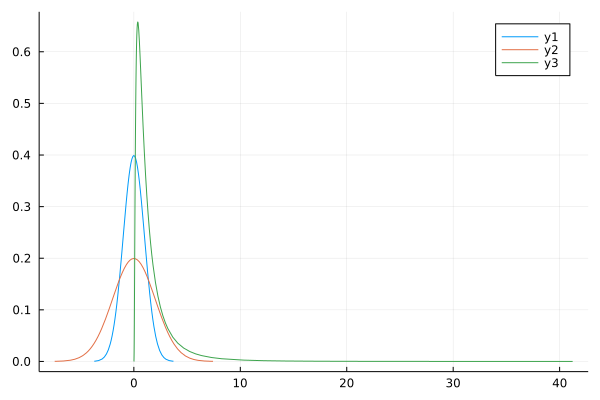

In [2]:
plot(Normal(0, 1))
plot!(Normal(0, 2))
plot!(LogNormal(0, 1))

# Singularities in Normal mixtures

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:11
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:11
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:11
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:11


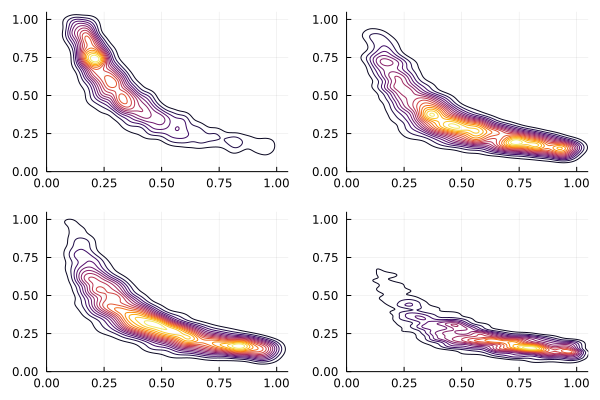

In [66]:
@model normal_mixture(y) = begin
    a ~ Uniform(0, 1)
    b ~ Uniform(0, 1)
    mixture = MixtureModel(
        Normal[
            Normal(0.0, 1.0),
            Normal(b, 1.0)
            ], 
        [1 - a, a]
    )
    y ~ filldist(mixture, length(y))
end;

aₒ, bₒ = (0.5, 0.3)
truth_dist = MixtureModel(
        Normal[
            Normal(0.0, 1.0),
            Normal(bₒ, 1.0)
            ], 
        [1 - aₒ, aₒ]
    )

plots = []
N = 1000
for i ∈ 1:4
    data = rand(truth_dist, N)
    model = normal_mixture(data)
    chain = sample(model, MH(), 10000);
#     push!(plots, StatsPlots.surface(kde(chain.value.data[:, 1:2, 1]), legend=false))
    p = plot(kde(chain.value.data[:, 1:2, 1]), legend=false, xlim=(0, 1.05), ylim=(0, 1.05))
    push!(plots, p)
end
plot(plots..., layout=(2, 2))


Sampling: 100%|█████████████████████████████████████████| Time: 0:00:54
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:55
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:55
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:55


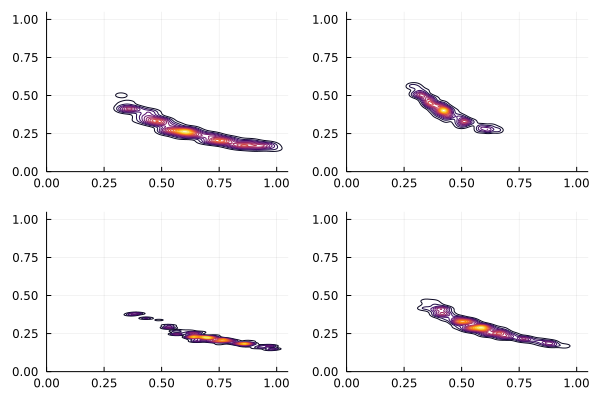

In [67]:
begin
    plots = []
    N = 10000
    for i ∈ 1:4
        data = rand(truth_dist, N)
        model = normal_mixture(data)
        chain = sample(model, MH(), 5000);
    #     push!(plots, StatsPlots.surface(kde(chain.value.data[:, 1:2, 1]), legend=false))
        p = plot(kde(chain.value.data[:, 1:2, 1]), legend=false, xlim=(0, 1.05), ylim=(0, 1.05))
        push!(plots, p)
    end
    plot(plots..., layout=(2, 2))
end

----

In [26]:
@model dice_throw(y) = begin
    p ~ Dirichlet(6, 1)
    y ~ filldist(Categorical(p), length(y))
end;

In [28]:
data = rand(DiscreteUniform(1, 6), 1000)
model = dice_throw(data);

In [51]:
chain = sample(model, NUTS(), 1000);
summaries, quantiles = describe(chain);

summaries

┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /home/edmund/.julia/packages/Turing/y0DW3/src/inference/hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/edmund/.julia/packages/AdvancedHMC/yd6UP/src/hamiltonian.jl:47
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:11


summaries = Summary Statistics (6 x 8)


Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

        p[1]    0.1545    0.0118     0.0004    0.0003   1125.5299    1.0006    ⋯
        p[2]    0.1415    0.0112     0.0004    0.0002   1316.0574    0.9993    ⋯
        p[3]    0.1828    0.0123     0.0004    0.0003   1574.5057    0.9998    ⋯
        p[4]    0.1851    0.0126     0.0004    0.0003   1581.1356    0.9992    ⋯
        p[5]    0.1659    0.0118     0.0004    0.0004   1256.4803    1.0015    ⋯
        p[6]    0.1702    0.0120     0.0004    0.0003   1515.4206    1.0006    ⋯
                                                                1 column omitted


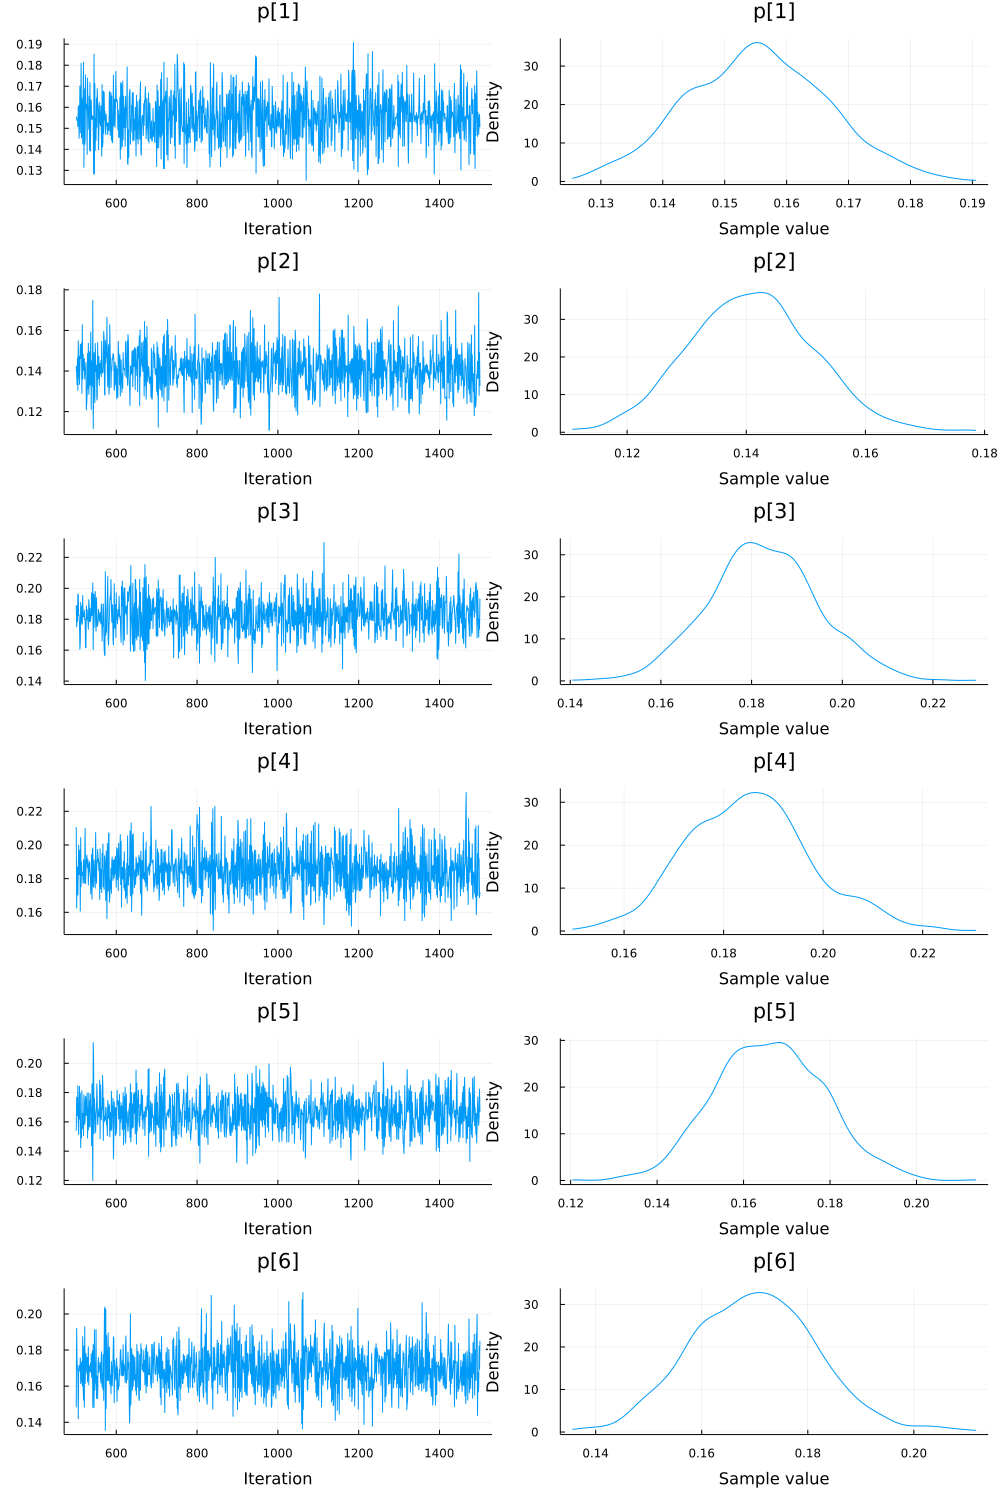

In [50]:
plot(chain)

In [52]:
prior_chain = sample(model, Prior(), 2000);
missing_data = Vector{Missing}(missing, length(data))
model_missing = dice_throw(missing_data)
model_predict = DynamicPPL.Model{(:y,)}(
    :model_predict_missing_data, 
    model_missing.f,
    model_missing.args,
    model_missing.defaults
)
prior_check = predict(model_predict, prior_chain)

Chains MCMC chain (2000×1000×1 Array{Float64, 3}):

Iterations        = 1:1:2000
Number of chains  = 1
Samples per chain = 2000
parameters        = y[123], y[335], y[796], y[734], y[6], y[624], y[681], y[639], y[333], y[601], y[100], y[31], y[346], y[476], y[757], y[998], y[444], y[108], y[684], y[230], y[258], y[234], y[64], y[597], y[319], y[417], y[599], y[474], y[262], y[489], y[220], y[246], y[382], y[784], y[525], y[60], y[552], y[261], y[550], y[183], y[555], y[871], y[656], y[354], y[900], y[126], y[278], y[777], y[613], y[72], y[741], y[321], y[575], y[61], y[671], y[765], y[358], y[167], y[515], y[590], y[269], y[252], y[369], y[91], y[379], y[191], y[102], y[4], y[750], y[818], y[312], y[236], y[695], y[843], y[324], y[703], y[111], y[315], y[727], y[764], y[390], y[910], y[986], y[249], y[501], y[117], y[988], y[132], y[179], y[241], y[158], y[831], y[823], y[429], y[899], y[795], y[532], y[705], y[668], y[567], y[386], y[484], y[917], y[688], y[415], y[794], y[141], y[712]

┌ Warning: timestamp of type Missing unknown
└ @ MCMCChains /home/edmund/.julia/packages/MCMCChains/IKF6o/src/chains.jl:364
┌ Warning: timestamp of type Missing unknown
└ @ MCMCChains /home/edmund/.julia/packages/MCMCChains/IKF6o/src/chains.jl:364


In [53]:
summarystats(prior_check[:, 1:5, :])

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

        y[1]    3.4770    1.7341     0.0388    0.0304   2012.3488    0.9995
        y[2]    3.5410    1.7332     0.0388    0.0382   2094.9866    0.9998
        y[3]    3.5015    1.6998     0.0380    0.0437   1978.5929    0.9995
        y[4]    3.5260    1.7518     0.0392    0.0353   2035.4928    0.9999
        y[5]    3.5250    1.7398     0.0389    0.0326   1951.0619    0.9995


---
# Bayesian Linear Regression
---


In [73]:
@model linreg(X, y; predictors=size(X, 2)) = begin
    α ~ Normal(mean(y), 2.5 * std(y))
    β ~ filldist(TDist(3), predictors)
    σ ~ Exponential(1)
    
    y ~ MvNormal(α .+ X * β, σ)
end;

In [74]:
url = "https://raw.githubusercontent.com/storopoli/Bayesian-Julia/master/datasets/kidiq.csv"
df_kidiq = CSV.read(HTTP.get(url).body, DataFrame)
describe(df_kidiq)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,kid_score,86.7972,20,90.0,144,0,Int64
2,mom_hs,0.785714,0,1.0,1,0,Int64
3,mom_iq,100.0,71.0374,97.9153,138.893,0,Float64
4,mom_age,22.7857,17,23.0,29,0,Int64


In [75]:
X = Matrix(select(df_kidiq, Not(:kid_score)))
y = df_kidiq[:, :kid_score]
model = linreg(X, y);
chain = sample(model, NUTS(), 5000)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/edmund/.julia/packages/AdvancedHMC/yd6UP/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/edmund/.julia/packages/AdvancedHMC/yd6UP/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/edmund/.julia/packages/AdvancedHMC/yd6UP/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/edmund/.julia/packages/AdvancedHMC/yd6UP/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, f

Chains MCMC chain (5000×17×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 8.32 seconds
Compute duration  = 8.32 seconds
parameters        = α, β[2], β[3], σ, β[1]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           α   20.8745    8.5440     0.1208    0.2123   1467.4045    1.0010    ⋯
        β[1]    1.9412    1.7594     0.0249    0.0317   2716.8186    1.0007    ⋯
        β[2]    0.5834    0.0590     0.0008    0.0012   2438.4805    1.0001    ⋯
        β[3]    0.2669    0.3076     0.0043    0.0067   1930.5703    1.0003    ⋯
           σ   17.8705    0.5948     0.0084    0.00

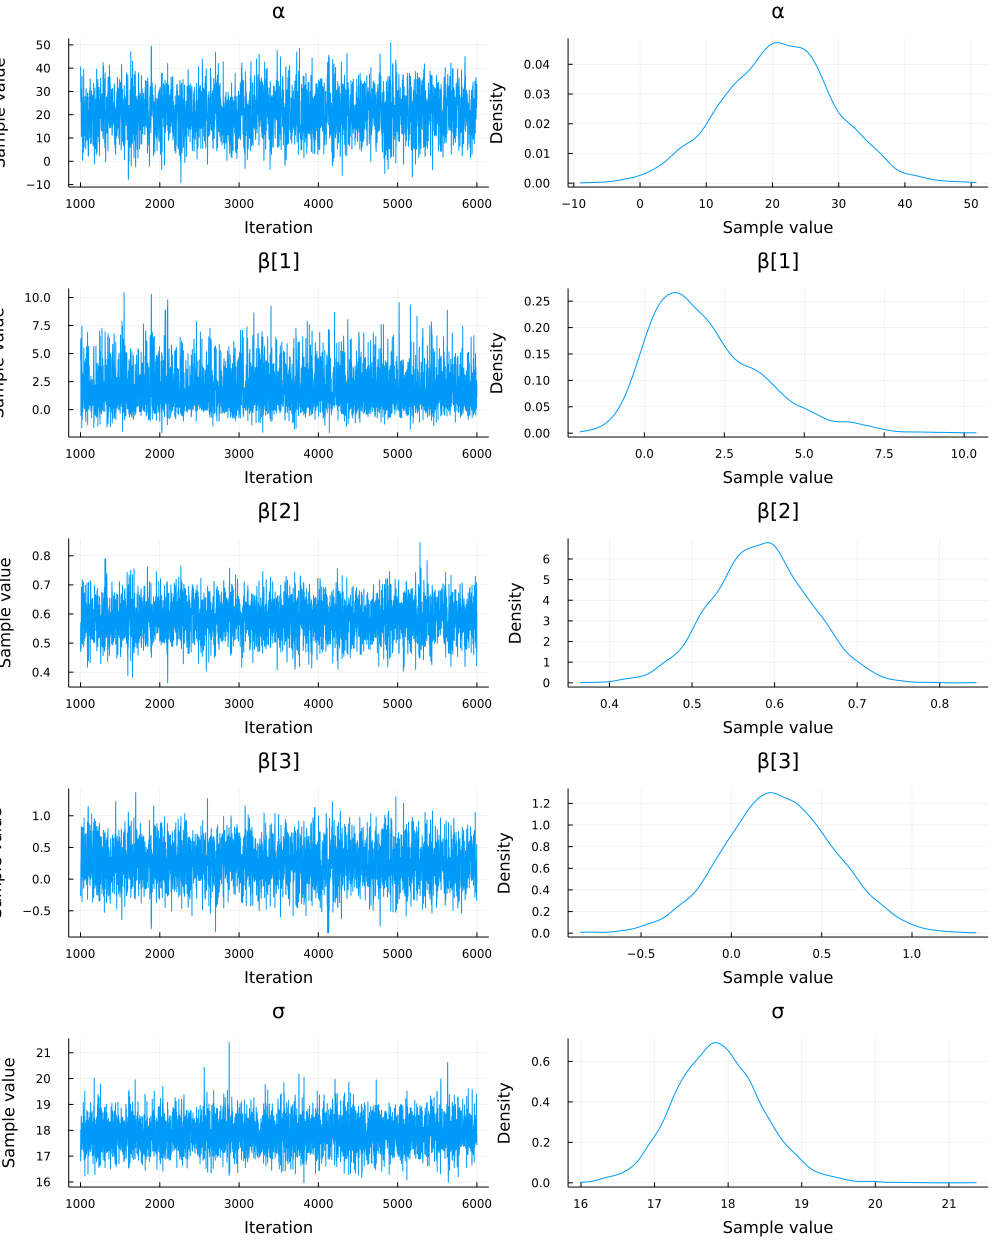

In [76]:
plot(chain)